# Bibliotecas:

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from yellowbrick.regressor import ResidualsPlot 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve


# Lendo arquivo:

In [226]:
arquivo = 'kc_house_data.csv'
base = pd.read_csv(arquivo)

# 5 primeiras linhas:

In [227]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 5 últimas linhas:

In [228]:
base.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# EAD:

In [229]:
base['date'] = pd.to_datetime(base['date'])
base['year'] = pd.to_datetime(base['date']).dt.year
base

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [230]:
base.shape

(21613, 22)

In [231]:
print(f"Contando o número de duplicatas: {base.duplicated().sum()}")

Contando o número de duplicatas: 0


In [232]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [233]:
base.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
dtype: int64

In [234]:
base.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


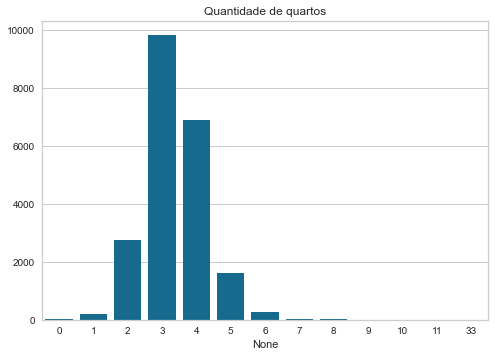

In [235]:
# Assuming 'base' is your DataFrame and you've already calculated contagem_por_categoria
bedrooms = base['bedrooms'].value_counts()

# Plotting
sns.barplot(x=bedrooms.index, y=bedrooms.values).set(title='Quantidade de quartos')
plt.show()

[Text(0.5, 1.0, 'Quantidade de banheiros')]

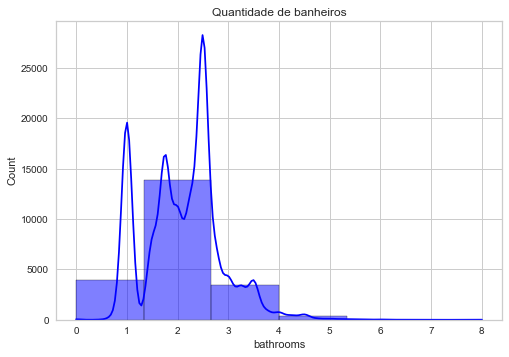

In [236]:
sns.histplot(base['bathrooms'], kde=True, bins=6, color='blue').set(title='Quantidade de banheiros')

[Text(0.5, 1.0, 'sqft_living')]

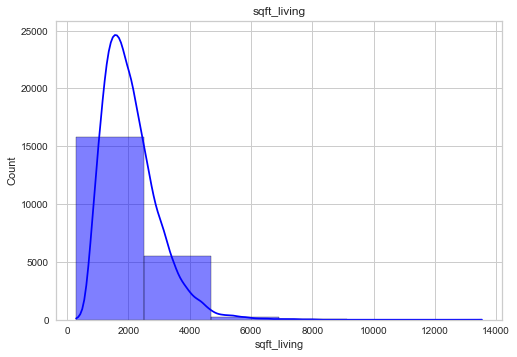

In [237]:
sns.histplot(base['sqft_living'], kde=True, bins=6, color='blue').set(title='sqft_living')

[Text(0.5, 1.0, 'sqft_lot')]

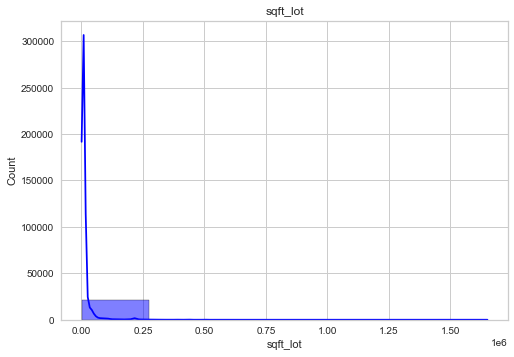

In [238]:
#sqft_lot
sns.histplot(base['sqft_lot'], kde=True, bins=6, color='blue').set(title='sqft_lot')

[Text(0.5, 1.0, 'floors')]

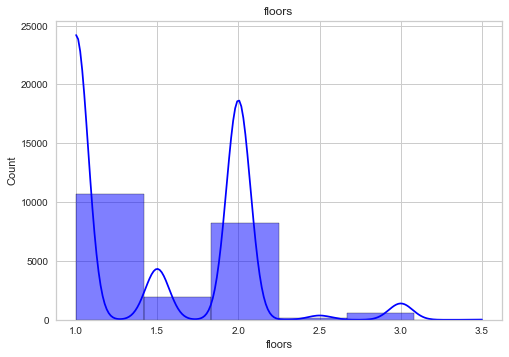

In [239]:
#floors
sns.histplot(base['floors'], kde=True, bins=6, color='blue').set(title='floors')

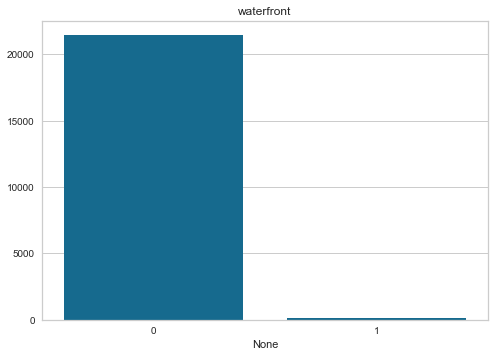

In [240]:
#waterfront
waterfront = base['waterfront'].value_counts()

# Plotting
sns.barplot(x=waterfront.index, y=waterfront.values).set(title='waterfront')
plt.show()

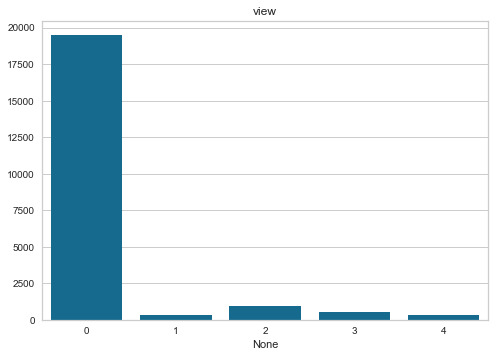

In [241]:
#view
view = base['view'].value_counts()

# Plotting
sns.barplot(x=view.index, y=view.values).set(title='view')
plt.show()

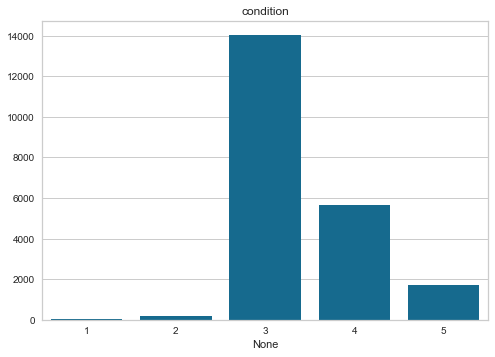

In [242]:
#view
condition = base['condition'].value_counts()

# Plotting
sns.barplot(x=condition.index, y=condition.values).set(title='condition')
plt.show()

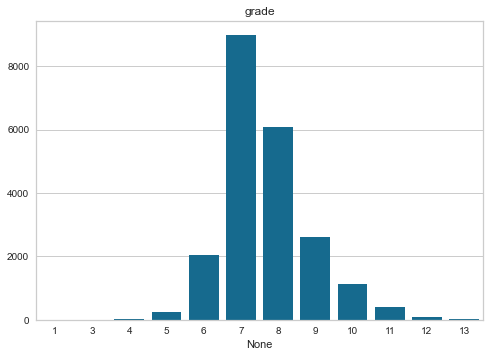

In [243]:
#view
grade = base['grade'].value_counts()

# Plotting
sns.barplot(x=grade.index, y=grade.values).set(title='grade')
plt.show()

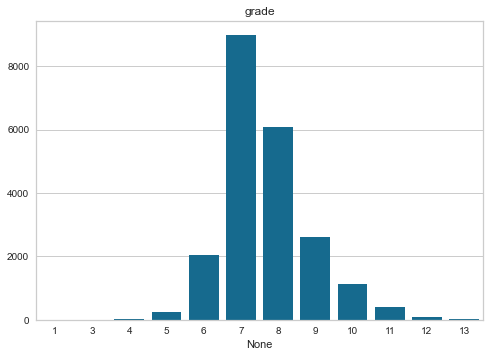

In [244]:
#view
grade = base['grade'].value_counts()

# Plotting
sns.barplot(x=grade.index, y=grade.values).set(title='grade')
plt.show()

[Text(0.5, 1.0, 'sqft_above')]

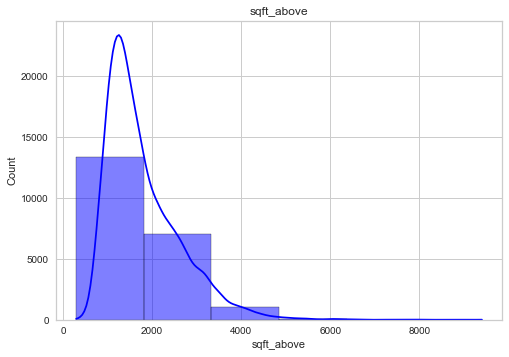

In [245]:
sns.histplot(base['sqft_above'], kde=True, bins=6, color='blue').set(title='sqft_above')

[Text(0.5, 1.0, 'sqft_basement')]

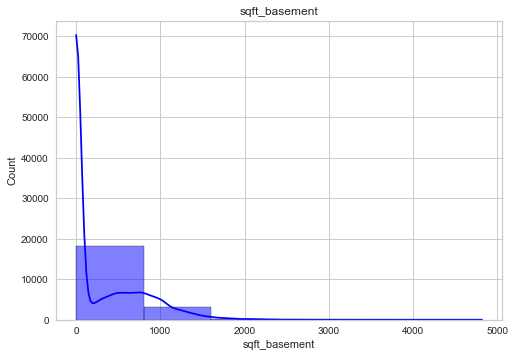

In [246]:
sns.histplot(base['sqft_basement'], kde=True, bins=6, color='blue').set(title='sqft_basement')

[Text(0.5, 1.0, 'yr_built')]

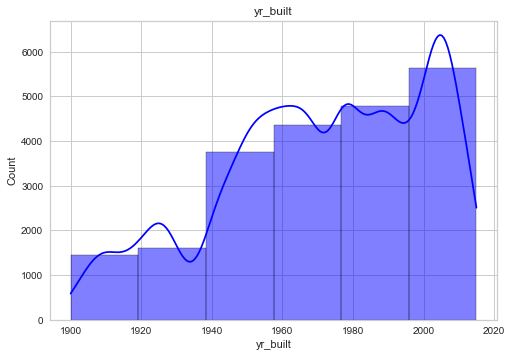

In [247]:
sns.histplot(base['yr_built'], kde=True, bins=6, color='blue').set(title='yr_built')

[Text(0.5, 1.0, 'yr_renovated')]

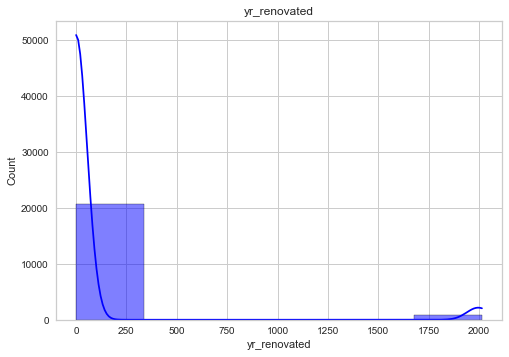

In [248]:
sns.histplot(base['yr_renovated'], kde=True, bins=6, color='blue').set(title='yr_renovated')

[Text(0.5, 1.0, 'sqft_living15')]

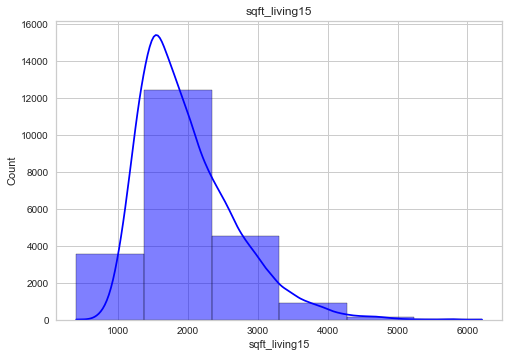

In [249]:
sns.histplot(base['sqft_living15'], kde=True, bins=6, color='blue').set(title='sqft_living15')

[Text(0.5, 1.0, 'sqft_lot15')]

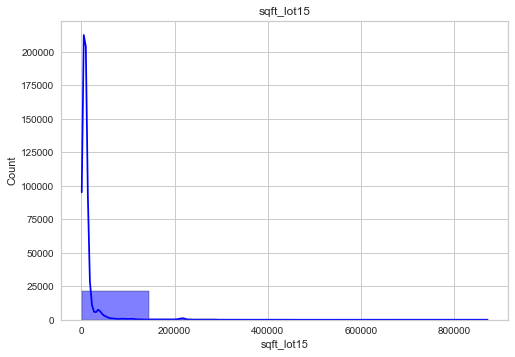

In [250]:
sns.histplot(base['sqft_lot15'], kde=True, bins=6, color='blue').set(title='sqft_lot15')

In [263]:
base.columns
df = base[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built','zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

<Axes: >

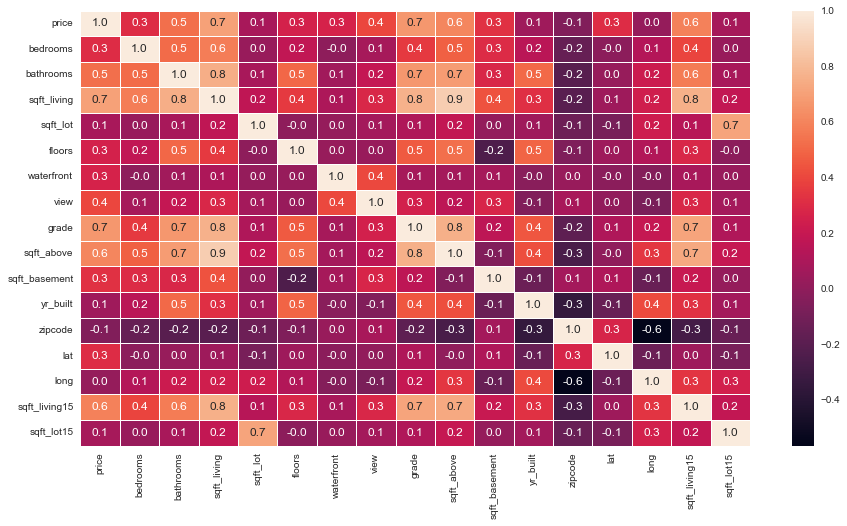

In [264]:
correlation = df.corr()
# Ajustar o tamanho da figura
plt.figure(figsize=(15, 8))  # Ajuste a largura e altura conforme necessário

# Criar o heatmap
plot = sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=.6)

#plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [265]:
X=df.drop('price', axis=1).values
y=df['price'].values

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)

print(f"Visualização dos coeficientes: {model.intercept_}")
print(f"Visualização da inclinação da reta: {model.coef_}")
print(f"O Modelo possui um Coeficiente R^2 de: {score:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {round(mse,2)}')

Visualização dos coeficientes: 11823452.39635449
Visualização da inclinação da reta: [-3.40239152e+04  4.83754588e+04  1.09812692e+02  7.76652415e-02
  5.64453316e+03  5.66889853e+05  5.42473899e+04  9.55004552e+04
  6.85442105e+01  4.12684812e+01 -2.99742405e+03 -5.90735482e+02
  5.88394854e+05 -1.91760209e+05  1.89779152e+01 -3.10659370e-01]
O Modelo possui um Coeficiente R^2 de: 0.70
Mean Squared Error: 45540516885.94


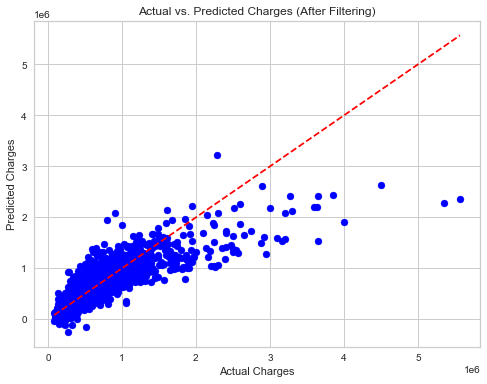

In [267]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (After Filtering)')
plt.grid(True)
plt.show()

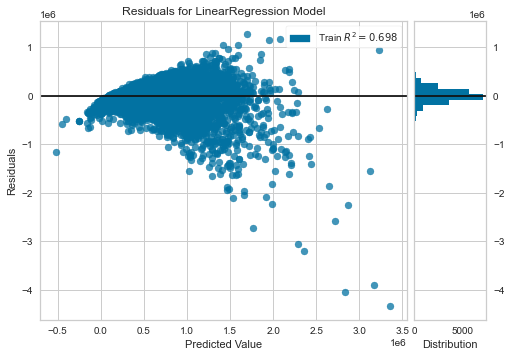

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [268]:
visualizador = ResidualsPlot(model)
visualizador.fit(X, y)
visualizador.poof()

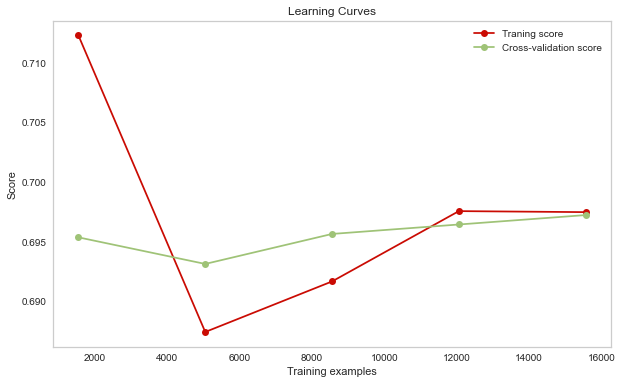

In [269]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Traning score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()